# Car Prices - Introduction to Regression

In [1]:
import pandas as pd
import numpy as np

# random forest regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
# for calculating the accuracy
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
# for splitting the data
from sklearn.model_selection import train_test_split

In [2]:
# cars data from kaggle
# https://www.kaggle.com/datasets/CooperUnion/cardataset
cars = pd.read_csv("../../Datasets/cars/data.csv")

### Data Exploration

In [3]:
cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
# since im getting an error when it comes to splitting the data,
# there could be an error where my y doesnt match the size of X
cars.count()

Make                 11914
Model                11914
Year                 11914
Engine Fuel Type     11911
Engine HP            11845
Engine Cylinders     11884
Transmission Type    11914
Driven_Wheels        11914
Number of Doors      11908
Market Category       8172
Vehicle Size         11914
Vehicle Style        11914
highway MPG          11914
city mpg             11914
Popularity           11914
MSRP                 11914
dtype: int64

In [5]:
cars.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
cars.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [7]:
cars.columns = cars.columns.str.lower()

### Data Cleaning

Since one of the features I want to use has null values, I need to fill it up first...

In [8]:
cars[cars['engine hp'].isnull()]

,make,model,year,engine fuel type,engine hp,engine cylinders,transmission type,driven_wheels,number of doors,market category,vehicle size,vehicle style,highway mpg,city mpg,popularity,msrp
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
2905,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,all wheel drive,4.0,Luxury,Large,Sedan,25,17,61,55915
2906,Lincoln,Continental,2017,premium unleaded (recommended),NaN,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Large,Sedan,27,18,61,62915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9850,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,35700
9851,Kia,Soul EV,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,33700
9852,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,33950
9853,Kia,Soul EV,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,4.0,NaN,Compact,Wagon,92,120,1720,31950


I'll try filling it out with the mode.

In [9]:
mode = cars['engine hp'].mode()[0]
print(mode)

200.0


In [10]:
# i think this doesnt overwrite the dataframe cars?
cars['engine hp'].fillna(mode)

0        335.0
1        300.0
2        300.0
3        230.0
4        230.0
         ...  
11909    300.0
11910    300.0
11911    300.0
11912    300.0
11913    221.0
Name: engine hp, Length: 11914, dtype: float64

In [11]:
cars.count()

make                 11914
model                11914
year                 11914
engine fuel type     11911
engine hp            11845
engine cylinders     11884
transmission type    11914
driven_wheels        11914
number of doors      11908
market category       8172
vehicle size         11914
vehicle style        11914
highway mpg          11914
city mpg             11914
popularity           11914
msrp                 11914
dtype: int64

Turns out the error I'm encountering when splitting the data is because of the 'engine hp' count that doesn't match the msrp count.\
I need to overwrite 'engine hp' to fix that with the fillna() call I did.

In [12]:
# overwrite
cars['engine hp'] = cars['engine hp'].fillna(mode)

Now I'll check if the count is the same now

In [13]:
cars.count()

make                 11914
model                11914
year                 11914
engine fuel type     11911
engine hp            11914
engine cylinders     11884
transmission type    11914
driven_wheels        11914
number of doors      11908
market category       8172
vehicle size         11914
vehicle style        11914
highway mpg          11914
city mpg             11914
popularity           11914
msrp                 11914
dtype: int64

I just found out I have to convert non-numerical data into numerical ones for a regressor model.\
I need to find out the sizes first cause it seems easier to figure out.

In [14]:
cars['vehicle size'].unique()

array(['Compact', 'Midsize', 'Large'], dtype=object)

I can probably set **compact = 1, midsize = 2, and large = 3**

In [15]:
# vehicle sizes dictionary
size_mapping = {'Compact': 1, 'Midsize': 2, 'Large': 3}
# mapping the vehicle sizes
cars['vehicle size'] = cars['vehicle size'].map(size_mapping)

In [16]:
# confirming if it was a success
cars['vehicle size']

0        1
1        1
2        1
3        1
4        1
        ..
11909    2
11910    2
11911    2
11912    2
11913    2
Name: vehicle size, Length: 11914, dtype: int64

It worked! lessened the mean absolute error for about 300~ msrp

Now, I want to deal with the brand.\
I'm thinking of considering the popularity.

In [17]:
cars[['model', 'msrp']].sort_values(by='msrp', ascending=False)

,model,msrp
11362,Veyron 16.4,2065902
11364,Veyron 16.4,1705769
8486,Reventon,1500000
11363,Veyron 16.4,1500000
6351,Landaulet,1382750
...,...,...
4425,Expo,2000
4424,Expo,2000
4423,Expo,2000
4422,Expo,2000


I thought of adding 'popularity' in the features and it somehow lessened MAE.\
But can I really rely on such a parameter? I should probably scrap it because popular cars can be cheap/expensive. Likewise, unpopular cars can be cheap/expensive as well!

## Applying New Learnings

Good news, we can actually perform logarithmic operations on the target data to get rid of the annoying tail in the distribution of prices.\
The tail causes confusion to our model somehow.

In [18]:
# transform with log
log_transformed_prices = np.log1p(cars['msrp'])

In [19]:
# overwrite our dataframe
cars['msrp'] = log_transformed_prices

### Using matplotlib

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

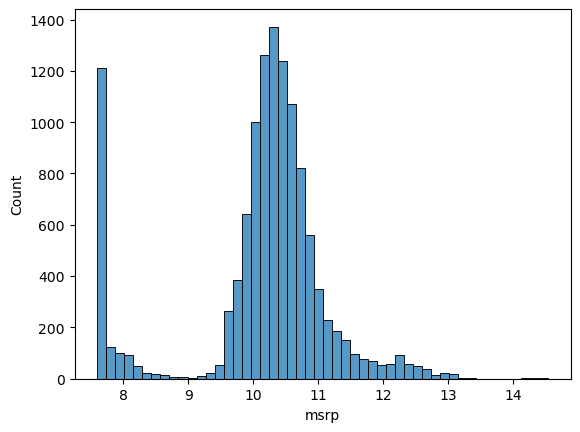

In [21]:
sns.histplot(cars.msrp, bins=50)
plt.show()

### Choosing Features and training data

In [22]:
# feature list
features = ['year', 'engine hp', 'highway mpg', 'city mpg', 'vehicle size', 'popularity']
X = cars[features]
y = cars.msrp

Confirming shapes...

In [23]:
X

,year,engine hp,highway mpg,city mpg,vehicle size,popularity
0,2011,335.0,26,19,1,3916
1,2011,300.0,28,19,1,3916
2,2011,300.0,28,20,1,3916
3,2011,230.0,28,18,1,3916
4,2011,230.0,28,18,1,3916
...,...,...,...,...,...,...
11909,2012,300.0,23,16,2,204
11910,2012,300.0,23,16,2,204
11911,2012,300.0,23,16,2,204
11912,2013,300.0,23,16,2,204


In [24]:
cars.values.shape

(11914, 16)

In [25]:
y.shape

(11914,)

### Splitting Data

In [74]:
# Split the data into 60% training and 40% temporary (validation + testing)
train_X, tmp_X, train_y, tmp_y = train_test_split(X, y, test_size=0.4, random_state=1)

# Further split the temporary data into 20% validation and 20% testing
val_X, test_X, val_y, test_y = train_test_split(tmp_X, tmp_y, test_size=0.5, random_state=1)

After lecture 2.4, I learned to drop irrelevant values like the indices before training the model.\
Shuffling was also recommended but train_test_split already does that.

In [75]:
train_y = train_y.values
val_y = val_y.values
test_y = test_y.values

### Training

In [79]:
rf_model = RandomForestRegressor()
rf_model.fit(train_X, train_y)

RandomForestRegressor()

In [82]:
# test accuracy using validation data
rf_val_predictions = rf_model.predict(val_X)
# convert log transformed predictions
# dont forget to subtract 1 because we added 1 with log operations earlier.
rf_val =  np.expm1(rf_val_predictions)
# comparison
rf_val_mae = mean_absolute_error(rf_val, np.exp(val_y))

In [83]:
print(rf_val_mae)

3633.4235487434335
